# **Actividad 4.2  (Regresión Logística)**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df=pd.read_csv("DataAnalytics.csv")




df["botón correcto"]=df["botón correcto"].fillna(100) ###
df["tiempo de interacción"]=df["tiempo de interacción"].fillna(100)
df["mini juego"]=df["mini juego"].fillna(100)
df["número de interacción"]=df["número de interacción"].fillna(100)
df["color presionado"]=df["color presionado"].fillna(100)



df["auto push"]=df["auto push"].fillna(100)
df["tiempo de lección"]=df["tiempo de lección"].fillna(100)
df["tiempo de sesión"]=df["tiempo de sesión"].fillna(100)

In [3]:
df.head()

,Administrador,Usuario,botón correcto,tiempo de interacción,mini juego,número de interacción,color presionado,dificultad,fecha,Juego,auto push,tiempo de lección,tiempo de sesión
0,nicolas,nicolas,1.0,5.399169,Despegue,1.0,blue,Episodio 1,25/01/2024 09:26:42 a. m.,Astro,0.0,0.0,0.0
1,nicolas,nicolas,0.0,1.283400,Despegue,2.0,violet,Episodio 1,25/01/2024 09:26:46 a. m.,Astro,0.0,0.0,0.0
2,nicolas,nicolas,1.0,2.700226,Despegue,3.0,green,Episodio 1,25/01/2024 09:26:48 a. m.,Astro,0.0,0.0,0.0
3,nicolas,nicolas,0.0,3.050262,Despegue,4.0,green,Episodio 1,25/01/2024 09:26:57 a. m.,Astro,0.0,0.0,0.0
4,nicolas,nicolas,0.0,4.750256,Despegue,5.0,green,Episodio 1,25/01/2024 09:26:58 a. m.,Astro,0.0,0.0,0.0


## Convertir las variables categóricas ordinales (“Administrador”, “Usuario”, “mini juego”, “color presionado”, “dificultad” y “Juego”) en variables numéricas respecto a su frecuencia

In [4]:
frecuencias = df['Administrador'].value_counts()

# 2. Crear un diccionario de mapeo: nombre -> número según frecuencia
mapeo_numeros = {nombre: i+1 for i, (nombre, count) in enumerate(frecuencias.items())}

# 3. Aplicar el reemplazo en la columna
df['Administrador_cat'] = df['Administrador'].map(mapeo_numeros)

df['Administrador_cat'] = df['Administrador_cat'].astype(int)
print(frecuencias)

Administrador
ALEIDA            3260
nicolas            440
LEONARDO           371
DENISSE            302
SERGIO ANGEL       243
CARLOS ENRIQUE     228
YAEL DAVID         224
AUSTIN             199
VALENTIN           163
erick              158
IKER BENJAMIN      128
KYTZIA              98
BENJAMIN            51
Name: count, dtype: int64


In [5]:
frecuencias = df['Usuario'].value_counts()

# 2. Crear un diccionario de mapeo: nombre -> número según frecuencia
mapeo_numeros = {nombre: i+1 for i, (nombre, count) in enumerate(frecuencias.items())}

# 3. Aplicar el reemplazo en la columna
df['Usuario_cat'] = df['Usuario'].map(mapeo_numeros)

df['Usuario_cat'] = df['Usuario_cat'].astype(int)
print(frecuencias)

Usuario
LEONARDO              546
ALEIDA                487
nicolas               440
JOSE JAVIER           394
LEONARDO              371
JESUS ALEJANDRO       356
ramiro isai           332
ADRIAN                280
SERGIO ANGEL          243
DENISSE               228
CARLOS ENRIQUE        228
YAEL DAVID            224
VALENTIN              163
erick                 158
IKER BENJAMIN         152
NICOLAS |             128
ERICK OSVALDO         126
CONCEPCION            103
KYTZIA                 98
AUSTIN                 96
JOSE IGNACIO TADEO     94
JOSE IAN               86
ASHLEY                 75
JOSHUA                 74
YEREMI YAZMIN          71
MA DEL ROSARIO         64
BENJAMIN               51
INGRID                 49
RENE                   44
CARLOS ABEL            39
ARLETT                 29
ESMERALDA              24
IRVING                 10
jesus eduardo           2
Name: count, dtype: int64


In [6]:
frecuencias = df['mini juego'].value_counts()

# 2. Crear un diccionario de mapeo: nombre -> número según frecuencia
mapeo_numeros = {nombre: i+1 for i, (nombre, count) in enumerate(frecuencias.items())}

# 3. Aplicar el reemplazo en la columna
df['minijuego_cat'] = df['mini juego'].map(mapeo_numeros)

df['minijuego_cat'] = df['minijuego_cat'].astype(int)
print(frecuencias)

mini juego
Asteroides            1054
Restaurante            869
Estrellas              813
Gusanos                748
sonidos y animales     743
animales y colores     545
figuras y colores      400
partes del cuerpo      320
Despegue               196
100                    156
MiniGame_0               8
MiniGame_3               5
MiniGame_2               5
MiniGame_1               3
Name: count, dtype: int64


In [7]:
frecuencias = df['color presionado'].value_counts()

# 2. Crear un diccionario de mapeo: nombre -> número según frecuencia
mapeo_numeros = {nombre: i+1 for i, (nombre, count) in enumerate(frecuencias.items())}

# 3. Aplicar el reemplazo en la columna
df['color_cat'] = df['color presionado'].map(mapeo_numeros)

df['color_cat'] = df['color_cat'].astype(int)
print(frecuencias)

color presionado
violet    1361
green     1298
yellow    1233
blue      1182
100        762
red         29
Name: count, dtype: int64


In [8]:
frecuencias = df['dificultad'].value_counts()

# 2. Crear un diccionario de mapeo: nombre -> número según frecuencia
mapeo_numeros = {nombre: i+1 for i, (nombre, count) in enumerate(frecuencias.items())}

# 3. Aplicar el reemplazo en la columna
df['dificultad_cat'] = df['dificultad'].map(mapeo_numeros)

df['dificultad_cat'] = df['dificultad_cat'].astype(int)
print(frecuencias)

dificultad
Episodio 1    2357
Episodio 2    1493
Episodio 3    1292
Episodio 4     723
Name: count, dtype: int64


In [9]:
frecuencias = df['Juego'].value_counts()

# 2. Crear un diccionario de mapeo: nombre -> número según frecuencia
mapeo_numeros = {nombre: i+1 for i, (nombre, count) in enumerate(frecuencias.items())}

# 3. Aplicar el reemplazo en la columna
df['Juego_cat'] = df['Juego'].map(mapeo_numeros)

df['Juego_cat'] = df['Juego_cat'].astype(int)
print(frecuencias)

Juego
Astro      3799
Cadetes    2066
Name: count, dtype: int64


## Correlaciones

<Axes: >

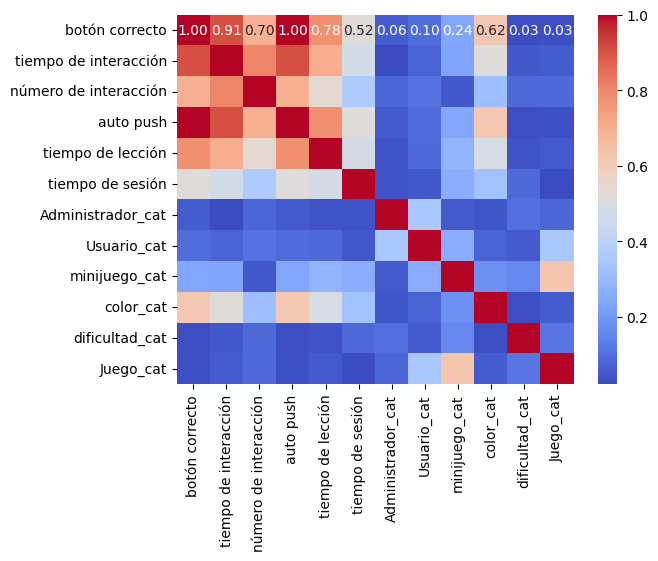

In [10]:
Dataframe_num=df.select_dtypes(["int","float","int64","float64"])

Corr_factors=Dataframe_num.corr()

#Obtener el valor absoluto
Corr_factors_abosluto=abs(Corr_factors)

#Ajustar el heatmap con los coeficientes de correlacion
Heat_map=sns.heatmap(Corr_factors_abosluto, cmap="coolwarm", annot=True, fmt=".2f")
Heat_map

In [11]:
df["auto push"].value_counts()

auto push
0.0      5049
100.0     762
1.0        54
Name: count, dtype: int64

In [12]:
df = df[df['botón correcto'] != 100]


In [13]:
precision_lista=[]
exactitud_lista=[]
sensibilidad_lista=[]

## Analizar la correlación logística que existe entre las variables dicotómicas de nuestra base de datos (botón correcto, juego, auto push)

### botón correcto

In [14]:
Vars_Indep=df[["color_cat", "tiempo de lección", "número de interacción"]]
Var_dep=df["botón correcto"]

X=Vars_Indep
y=Var_dep

#Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

#Escalar los datos
escalar= StandardScaler()

X_train=escalar.fit_transform(X_train)
X_test=escalar.fit_transform(X_test)

#Definir el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo=LogisticRegression()

algoritmo.fit(X_train, y_train)

y_pred=algoritmo.predict(X_test)

#Matriz de confusión
from sklearn.metrics import confusion_matrix
matriz=confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(matriz)

#Calcular la precisión
from sklearn.metrics import precision_score
precision=precision_score(y_test, y_pred, average="binary", pos_label=1)
print("Precision del modelo:")
print(precision)

#Calcular la exactitud
from sklearn.metrics import accuracy_score
exactitud=accuracy_score(y_test, y_pred)
print("Exactitud del modelo:")
print(exactitud)

#Calcular la sensibilidad
from sklearn.metrics import recall_score
sensibilidad=recall_score(y_test, y_pred, average="binary", pos_label=1)
print("Sensibilidad del modelo:")
print(sensibilidad)

precision_lista.append(precision)
exactitud_lista.append(exactitud)
sensibilidad_lista.append(sensibilidad)

Matriz de confusión:
[[385 388]
 [169 589]]
Precision del modelo:
0.6028659160696008
Exactitud del modelo:
0.6361854996734161
Sensibilidad del modelo:
0.7770448548812665


### juego

In [15]:
Vars_Indep=df[["color_cat", "tiempo de lección", "número de interacción"]]
Var_dep=df["Juego"]

X=Vars_Indep
y=Var_dep

#Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

#Escalar los datos
escalar= StandardScaler()

X_train=escalar.fit_transform(X_train)
X_test=escalar.fit_transform(X_test)

#Definir el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo=LogisticRegression()

algoritmo.fit(X_train, y_train)

y_pred=algoritmo.predict(X_test)

#Matriz de confusión
from sklearn.metrics import confusion_matrix
matriz=confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(matriz)

#Calcular la precisión
from sklearn.metrics import precision_score
precision=precision_score(y_test, y_pred, average="binary", pos_label="Astro")
print("Precision del modelo:")
print(precision)

#Calcular la exactitud
from sklearn.metrics import accuracy_score
exactitud=accuracy_score(y_test, y_pred)
print("Exactitud del modelo:")
print(exactitud)

#Calcular la sensibilidad
from sklearn.metrics import recall_score
sensibilidad=recall_score(y_test, y_pred, average="binary", pos_label="Astro")
print("Sensibilidad del modelo:")
print(sensibilidad)

precision_lista.append(precision)
exactitud_lista.append(exactitud)
sensibilidad_lista.append(sensibilidad)

Matriz de confusión:
[[986   0]
 [545   0]]
Precision del modelo:
0.6440235140431091
Exactitud del modelo:
0.6440235140431091
Sensibilidad del modelo:
1.0


### auto push

In [16]:
Vars_Indep=df[["color_cat", "tiempo de lección", "número de interacción"]]
Var_dep=df["auto push"]

X=Vars_Indep
y=Var_dep

#Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

#Escalar los datos
escalar= StandardScaler()

X_train=escalar.fit_transform(X_train)
X_test=escalar.fit_transform(X_test)

#Definir el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo=LogisticRegression()

algoritmo.fit(X_train, y_train)

y_pred=algoritmo.predict(X_test)

#Matriz de confusión
from sklearn.metrics import confusion_matrix
matriz=confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(matriz)

#Calcular la precisión
from sklearn.metrics import precision_score
precision=precision_score(y_test, y_pred, average="binary", pos_label=1)
print("Precision del modelo:")
print(precision)

#Calcular la exactitud
from sklearn.metrics import accuracy_score
exactitud=accuracy_score(y_test, y_pred)
print("Exactitud del modelo:")
print(exactitud)

#Calcular la sensibilidad
from sklearn.metrics import recall_score
sensibilidad=recall_score(y_test, y_pred, average="binary", pos_label=1)
print("Sensibilidad del modelo:")
print(sensibilidad)

precision_lista.append(precision)
exactitud_lista.append(exactitud)
sensibilidad_lista.append(sensibilidad)

Matriz de confusión:
[[1513    0]
 [  18    0]]
Precision del modelo:
0.0
Exactitud del modelo:
0.9882429784454605
Sensibilidad del modelo:
0.0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Convertir las variables (color presionado(5), dificultad, mini juego(2), numero de interacción, usuario(5)) en variables de tipo  dicotómica

### color presionado (5)

In [17]:
#Verificar los valores sin repetirse de una columna
unico=np.unique(df["color presionado"])
unico


array(['blue', 'green', 'red', 'violet', 'yellow'], dtype=object)

#### Rojo

In [18]:
df2=df

df2 = df2[df2['botón correcto'] != 100]

#CONVERTIR UNA VARIABLE CATEGÓRICA A DICOTÓMICA

df2["color presionado"]=df2["color presionado"].replace(["blue", "green", "violet", "yellow"], "Otro")

Vars_Indep=df2[["botón correcto", "tiempo de lección", "número de interacción"]]
Var_dep=df2["color presionado"]

X=Vars_Indep
y=Var_dep

#Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

#Escalar los datos
escalar= StandardScaler()

X_train=escalar.fit_transform(X_train)
X_test=escalar.fit_transform(X_test)

#Definir el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo=LogisticRegression()

algoritmo.fit(X_train, y_train)

y_pred=algoritmo.predict(X_test)

#Matriz de confusión
from sklearn.metrics import confusion_matrix
matriz=confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(matriz)

#Calcular la precisión
from sklearn.metrics import precision_score
precision=precision_score(y_test, y_pred, average="binary", pos_label="red")
print("Precision del modelo:")
print(precision)

#Calcular la exactitud
from sklearn.metrics import accuracy_score
exactitud=accuracy_score(y_test, y_pred)
print("Exactitud del modelo:")
print(exactitud)

#Calcular la sensibilidad
from sklearn.metrics import recall_score
sensibilidad=recall_score(y_test, y_pred, average="binary", pos_label="red")
print("Sensibilidad del modelo:")
print(sensibilidad)

precision_lista.append(precision)
exactitud_lista.append(exactitud)
sensibilidad_lista.append(sensibilidad)

Matriz de confusión:
[[1524    0]
 [   7    0]]
Precision del modelo:
0.0
Exactitud del modelo:
0.9954278249510125
Sensibilidad del modelo:
0.0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### azul

In [19]:
df3=df

df3 = df3[df3['botón correcto'] != 100]

#CONVERTIR UNA VARIABLE CATEGÓRICA A DICOTÓMICA

df3["color presionado"]=df3["color presionado"].replace(["red", "green", "violet", "yellow"], "Otro")

Vars_Indep=df3[["botón correcto", "tiempo de lección", "número de interacción"]]
Var_dep=df3["color presionado"]

X=Vars_Indep
y=Var_dep

#Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

#Escalar los datos
escalar= StandardScaler()

X_train=escalar.fit_transform(X_train)
X_test=escalar.fit_transform(X_test)

#Definir el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo=LogisticRegression()

algoritmo.fit(X_train, y_train)

y_pred=algoritmo.predict(X_test)

#Matriz de confusión
from sklearn.metrics import confusion_matrix
matriz=confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(matriz)

#Calcular la precisión
from sklearn.metrics import precision_score
precision=precision_score(y_test, y_pred, average="binary", pos_label="blue")
print("Precision del modelo:")
print(precision)

#Calcular la exactitud
from sklearn.metrics import accuracy_score
exactitud=accuracy_score(y_test, y_pred)
print("Exactitud del modelo:")
print(exactitud)

#Calcular la sensibilidad
from sklearn.metrics import recall_score
sensibilidad=recall_score(y_test, y_pred, average="binary", pos_label="blue")
print("Sensibilidad del modelo:")
print(sensibilidad)

precision_lista.append(precision)
exactitud_lista.append(exactitud)
sensibilidad_lista.append(sensibilidad)

Matriz de confusión:
[[1173    0]
 [ 358    0]]
Precision del modelo:
0.0
Exactitud del modelo:
0.7661659046374918
Sensibilidad del modelo:
0.0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### verde

In [20]:
df4=df

df4 = df4[df4['botón correcto'] != 100]

#CONVERTIR UNA VARIABLE CATEGÓRICA A DICOTÓMICA

df4["color presionado"]=df4["color presionado"].replace(["red", "blue", "violet", "yellow"], "Otro")

Vars_Indep=df4[["botón correcto", "tiempo de lección", "número de interacción"]]
Var_dep=df4["color presionado"]

X=Vars_Indep
y=Var_dep

#Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

#Escalar los datos
escalar= StandardScaler()

X_train=escalar.fit_transform(X_train)
X_test=escalar.fit_transform(X_test)

#Definir el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo=LogisticRegression()

algoritmo.fit(X_train, y_train)

y_pred=algoritmo.predict(X_test)

#Matriz de confusión
from sklearn.metrics import confusion_matrix
matriz=confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(matriz)

#Calcular la precisión
from sklearn.metrics import precision_score
precision=precision_score(y_test, y_pred, average="binary", pos_label="green")
print("Precision del modelo:")
print(precision)

#Calcular la exactitud
from sklearn.metrics import accuracy_score
exactitud=accuracy_score(y_test, y_pred)
print("Exactitud del modelo:")
print(exactitud)

#Calcular la sensibilidad
from sklearn.metrics import recall_score
sensibilidad=recall_score(y_test, y_pred, average="binary", pos_label="green")
print("Sensibilidad del modelo:")
print(sensibilidad)

precision_lista.append(precision)
exactitud_lista.append(exactitud)
sensibilidad_lista.append(sensibilidad)

Matriz de confusión:
[[1140    0]
 [ 391    0]]
Precision del modelo:
0.0
Exactitud del modelo:
0.744611365120836
Sensibilidad del modelo:
0.0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### violeta

In [21]:
df5=df

df5 = df5[df5['botón correcto'] != 100]

#CONVERTIR UNA VARIABLE CATEGÓRICA A DICOTÓMICA

df5["color presionado"]=df5["color presionado"].replace(["red", "blue", "green", "yellow"], "Otro")

Vars_Indep=df5[["botón correcto", "tiempo de lección", "número de interacción"]]
Var_dep=df5["color presionado"]

X=Vars_Indep
y=Var_dep

#Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

#Escalar los datos
escalar= StandardScaler()

X_train=escalar.fit_transform(X_train)
X_test=escalar.fit_transform(X_test)

#Definir el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo=LogisticRegression()

algoritmo.fit(X_train, y_train)

y_pred=algoritmo.predict(X_test)

#Matriz de confusión
from sklearn.metrics import confusion_matrix
matriz=confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(matriz)

#Calcular la precisión
from sklearn.metrics import precision_score
precision=precision_score(y_test, y_pred, average="binary", pos_label="violet")
print("Precision del modelo:")
print(precision)

#Calcular la exactitud
from sklearn.metrics import accuracy_score
exactitud=accuracy_score(y_test, y_pred)
print("Exactitud del modelo:")
print(exactitud)

#Calcular la sensibilidad
from sklearn.metrics import recall_score
sensibilidad=recall_score(y_test, y_pred, average="binary", pos_label="violet")
print("Sensibilidad del modelo:")
print(sensibilidad)

precision_lista.append(precision)
exactitud_lista.append(exactitud)
sensibilidad_lista.append(sensibilidad)

Matriz de confusión:
[[1122    4]
 [ 349   56]]
Precision del modelo:
0.9333333333333333
Exactitud del modelo:
0.7694317439581972
Sensibilidad del modelo:
0.1382716049382716


#### yellow

In [22]:
df6=df

df6 = df6[df6['botón correcto'] != 100]

#CONVERTIR UNA VARIABLE CATEGÓRICA A DICOTÓMICA

df6["color presionado"]=df6["color presionado"].replace(["red", "blue", "green", "violet"], "Otro")

Vars_Indep=df6[["botón correcto", "tiempo de lección", "número de interacción"]]
Var_dep=df6["color presionado"]

X=Vars_Indep
y=Var_dep

#Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

#Escalar los datos
escalar= StandardScaler()

X_train=escalar.fit_transform(X_train)
X_test=escalar.fit_transform(X_test)

#Definir el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo=LogisticRegression()

algoritmo.fit(X_train, y_train)

y_pred=algoritmo.predict(X_test)

#Matriz de confusión
from sklearn.metrics import confusion_matrix
matriz=confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(matriz)

#Calcular la precisión
from sklearn.metrics import precision_score
precision=precision_score(y_test, y_pred, average="binary", pos_label="yellow")
print("Precision del modelo:")
print(precision)

#Calcular la exactitud
from sklearn.metrics import accuracy_score
exactitud=accuracy_score(y_test, y_pred)
print("Exactitud del modelo:")
print(exactitud)

#Calcular la sensibilidad
from sklearn.metrics import recall_score
sensibilidad=recall_score(y_test, y_pred, average="binary", pos_label="yellow")
print("Sensibilidad del modelo:")
print(sensibilidad)

precision_lista.append(precision)
exactitud_lista.append(exactitud)
sensibilidad_lista.append(sensibilidad)

Matriz de confusión:
[[1164    0]
 [ 367    0]]
Precision del modelo:
0.0
Exactitud del modelo:
0.760287393860222
Sensibilidad del modelo:
0.0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### dificultad

In [23]:
#Verificar los valores sin repetirse de una columna
unico=np.unique(df["dificultad"])
unico

array(['Episodio 1', 'Episodio 2', 'Episodio 3', 'Episodio 4'],
      dtype=object)

In [24]:

#CONVERTIR UNA VARIABLE CATEGÓRICA A DICOTÓMICA

df["dificultad"]=df["dificultad"].replace(["Episodio 2", "Episodio 3", "Episodio 4"], "Otro")

Vars_Indep=df[["botón correcto", "tiempo de lección", "número de interacción", "Usuario_cat"]]
Var_dep=df["dificultad"]

X=Vars_Indep
y=Var_dep

#Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

#Escalar los datos
escalar= StandardScaler()

X_train=escalar.fit_transform(X_train)
X_test=escalar.fit_transform(X_test)

#Definir el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo=LogisticRegression()

algoritmo.fit(X_train, y_train)

y_pred=algoritmo.predict(X_test)

#Matriz de confusión
from sklearn.metrics import confusion_matrix
matriz=confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(matriz)

#Calcular la precisión
from sklearn.metrics import precision_score
precision=precision_score(y_test, y_pred, average="binary", pos_label="Episodio 1")
print("Precision del modelo:")
print(precision)

#Calcular la exactitud
from sklearn.metrics import accuracy_score
exactitud=accuracy_score(y_test, y_pred)
print("Exactitud del modelo:")
print(exactitud)

#Calcular la sensibilidad
from sklearn.metrics import recall_score
sensibilidad=recall_score(y_test, y_pred, average="binary", pos_label="Episodio 1")
print("Sensibilidad del modelo:")
print(sensibilidad)

precision_lista.append(precision)
exactitud_lista.append(exactitud)
sensibilidad_lista.append(sensibilidad)

Matriz de confusión:
[[ 81 542]
 [ 32 876]]
Precision del modelo:
0.7168141592920354
Exactitud del modelo:
0.6250816459830176
Sensibilidad del modelo:
0.13001605136436598


### Mini juego (2)

#### mini juego #1 Asteroides

In [25]:
df2=df.copy()
df2["mini juego"].value_counts()

mini juego
Asteroides            957
Restaurante           805
Estrellas             731
Gusanos               674
sonidos y animales    659
animales y colores    478
figuras y colores     352
partes del cuerpo     280
Despegue              167
Name: count, dtype: int64

In [26]:
df["mini juego"].value_counts()

mini juego
Asteroides            957
Restaurante           805
Estrellas             731
Gusanos               674
sonidos y animales    659
animales y colores    478
figuras y colores     352
partes del cuerpo     280
Despegue              167
Name: count, dtype: int64

In [27]:

#CONVERTIR UNA VARIABLE CATEGÓRICA A DICOTÓMICA

df2["mini juego"]=df2["mini juego"].replace(["Restaurante", "Estrellas", "Gusanos", "sonidos y animales", "animales y colores",
                                             "figuras y colores", "partes del cuerpo", "Despegue"] , "Otro")

Vars_Indep=df2[["botón correcto", "tiempo de lección", "número de interacción"]]
Var_dep=df2["mini juego"]

X=Vars_Indep
y=Var_dep

#Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

#Escalar los datos
escalar= StandardScaler()

X_train=escalar.fit_transform(X_train)
X_test=escalar.fit_transform(X_test)

#Definir el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo=LogisticRegression()

algoritmo.fit(X_train, y_train)

y_pred=algoritmo.predict(X_test)

#Matriz de confusión
from sklearn.metrics import confusion_matrix
matriz=confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(matriz)

#Calcular la precisión
from sklearn.metrics import precision_score
precision=precision_score(y_test, y_pred, average="binary", pos_label="Asteroides")
print("Precision del modelo:")
print(precision)

#Calcular la exactitud
from sklearn.metrics import accuracy_score
exactitud=accuracy_score(y_test, y_pred)
print("Exactitud del modelo:")
print(exactitud)

#Calcular la sensibilidad
from sklearn.metrics import recall_score
sensibilidad=recall_score(y_test, y_pred, average="binary", pos_label="Asteroides")
print("Sensibilidad del modelo:")
print(sensibilidad)

precision_lista.append(precision)
exactitud_lista.append(exactitud)
sensibilidad_lista.append(sensibilidad)

Matriz de confusión:
[[   0  296]
 [   0 1235]]
Precision del modelo:
0.0
Exactitud del modelo:
0.806662312214239
Sensibilidad del modelo:
0.0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### mini juego #2 Restaurante

In [28]:
df["mini juego"].value_counts()
df2 = df.copy()

df2["mini juego"].value_counts()

mini juego
Asteroides            957
Restaurante           805
Estrellas             731
Gusanos               674
sonidos y animales    659
animales y colores    478
figuras y colores     352
partes del cuerpo     280
Despegue              167
Name: count, dtype: int64

In [29]:

#CONVERTIR UNA VARIABLE CATEGÓRICA A DICOTÓMICA

df2["mini juego"]=df2["mini juego"].replace(["Restaurante", "Asteroides", "Gusanos", "sonidos y animales", "animales y colores",
                                             "figuras y colores", "partes del cuerpo", "Despegue"] , "Otro")

Vars_Indep=df2[["botón correcto", "tiempo de lección", "número de interacción"]]
Var_dep=df2["mini juego"]

X=Vars_Indep
y=Var_dep

#Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

#Escalar los datos
escalar= StandardScaler()

X_train=escalar.fit_transform(X_train)
X_test=escalar.fit_transform(X_test)

#Definir el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo=LogisticRegression()

algoritmo.fit(X_train, y_train)

y_pred=algoritmo.predict(X_test)

#Matriz de confusión
from sklearn.metrics import confusion_matrix
matriz=confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(matriz)

#Calcular la precisión
from sklearn.metrics import precision_score
precision=precision_score(y_test, y_pred, average="binary", pos_label="Estrellas")
print("Precision del modelo:")
print(precision)

#Calcular la exactitud
from sklearn.metrics import accuracy_score
exactitud=accuracy_score(y_test, y_pred)
print("Exactitud del modelo:")
print(exactitud)

#Calcular la sensibilidad
from sklearn.metrics import recall_score
sensibilidad=recall_score(y_test, y_pred, average="binary", pos_label="Estrellas")
print("Sensibilidad del modelo:")
print(sensibilidad)

precision_lista.append(precision)
exactitud_lista.append(exactitud)
sensibilidad_lista.append(sensibilidad)

Matriz de confusión:
[[   0  206]
 [   0 1325]]
Precision del modelo:
0.0
Exactitud del modelo:
0.8654474199869366
Sensibilidad del modelo:
0.0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### número de interacción

In [30]:
type(df["número de interacción"])
df["número de interacción"] = pd.to_numeric(df["número de interacción"])

In [31]:
#Crear categorias a partir de clases
Max=df["número de interacción"].max()
Min=df["número de interacción"].min()

limites=[Min, Max]
limites

[1.0, 256.0]

In [32]:
#Declarar dos intervalos
intervalos=np.linspace(-0.1,256.1, 3)
intervalos

categorias=["número de interacción bajo", "número de interacción alto<"]

df["número de interacción"]=pd.cut(x=df["número de interacción"], bins=intervalos, labels=categorias)

In [33]:
Vars_Indep=df[["botón correcto", "tiempo de lección", "Usuario_cat"]]
Var_dep=df["número de interacción"]

X=Vars_Indep
y=Var_dep

#Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

#Escalar los datos
escalar= StandardScaler()

X_train=escalar.fit_transform(X_train)
X_test=escalar.fit_transform(X_test)

#Definir el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo=LogisticRegression()

algoritmo.fit(X_train, y_train)

y_pred=algoritmo.predict(X_test)

#Matriz de confusión
from sklearn.metrics import confusion_matrix
matriz=confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(matriz)

#Calcular la precisión
from sklearn.metrics import precision_score
precision=precision_score(y_test, y_pred, average="binary", pos_label="número de interacción bajo")
print("Precision del modelo:")
print(precision)

#Calcular la exactitud
from sklearn.metrics import accuracy_score
exactitud=accuracy_score(y_test, y_pred)
print("Exactitud del modelo:")
print(exactitud)

#Calcular la sensibilidad
from sklearn.metrics import recall_score
sensibilidad=recall_score(y_test, y_pred, average="binary", pos_label="número de interacción bajo")
print("Sensibilidad del modelo:")
print(sensibilidad)

precision_lista.append(precision)
exactitud_lista.append(exactitud)
sensibilidad_lista.append(sensibilidad)

Matriz de confusión:
[[   0   31]
 [   0 1500]]
Precision del modelo:
0.9797517962116263
Exactitud del modelo:
0.9797517962116263
Sensibilidad del modelo:
1.0


### Usuario (5)

#### JOSE IAN

In [34]:
#CONVERTIR UNA VARIABLE CATEGÓRICA A DICOTÓMICA

df2=df.copy()

for x in df2["Usuario"]:

    if x != "JOSE IAN":
        df2["Usuario"]=df2["Usuario"].replace(x, "Otro")

Vars_Indep=df2[["botón correcto", "tiempo de lección", "Usuario_cat", "Administrador_cat"]]
Var_dep=df2["Usuario"]

X=Vars_Indep
y=Var_dep

#Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

#Escalar los datos
escalar= StandardScaler()

X_train=escalar.fit_transform(X_train)
X_test=escalar.fit_transform(X_test)

#Definir el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo=LogisticRegression()

algoritmo.fit(X_train, y_train)

y_pred=algoritmo.predict(X_test)

#Matriz de confusión
from sklearn.metrics import confusion_matrix
matriz=confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(matriz)

#Calcular la precisión
from sklearn.metrics import precision_score
precision=precision_score(y_test, y_pred, average="binary", pos_label="JOSE IAN")
print("Precision del modelo:")
print(precision)

#Calcular la exactitud
from sklearn.metrics import accuracy_score
exactitud=accuracy_score(y_test, y_pred)
print("Exactitud del modelo:")
print(exactitud)

#Calcular la sensibilidad
from sklearn.metrics import recall_score
sensibilidad=recall_score(y_test, y_pred, average="binary", pos_label="JOSE IAN")
print("Sensibilidad del modelo:")
print(sensibilidad)

precision_lista.append(precision)
exactitud_lista.append(exactitud)
sensibilidad_lista.append(sensibilidad)

Matriz de confusión:
[[   0   18]
 [   0 1513]]
Precision del modelo:
0.0
Exactitud del modelo:
0.9882429784454605
Sensibilidad del modelo:
0.0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### JOSE IGNACIO TADEO

In [35]:
#CONVERTIR UNA VARIABLE CATEGÓRICA A DICOTÓMICA

df3=df.copy()

for x in df3["Usuario"]:

    if x != "JOSE IGNACIO TADEO":
        df3["Usuario"]=df3["Usuario"].replace(x, "Otro")

Vars_Indep=df3[["botón correcto", "tiempo de lección", "Usuario_cat", "Administrador_cat"]]
Var_dep=df3["Usuario"]

X=Vars_Indep
y=Var_dep

#Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

#Escalar los datos
escalar= StandardScaler()

X_train=escalar.fit_transform(X_train)
X_test=escalar.fit_transform(X_test)

#Definir el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo=LogisticRegression()

algoritmo.fit(X_train, y_train)

y_pred=algoritmo.predict(X_test)

#Matriz de confusión
from sklearn.metrics import confusion_matrix
matriz=confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(matriz)

#Calcular la precisión
from sklearn.metrics import precision_score
precision=precision_score(y_test, y_pred, average="binary", pos_label="JOSE IGNACIO TADEO")
print("Precision del modelo:")
print(precision)

#Calcular la exactitud
from sklearn.metrics import accuracy_score
exactitud=accuracy_score(y_test, y_pred)
print("Exactitud del modelo:")
print(exactitud)

#Calcular la sensibilidad
from sklearn.metrics import recall_score
sensibilidad=recall_score(y_test, y_pred, average="binary", pos_label="JOSE IGNACIO TADEO")
print("Sensibilidad del modelo:")
print(sensibilidad)

precision_lista.append(precision)
exactitud_lista.append(exactitud)
sensibilidad_lista.append(sensibilidad)

Matriz de confusión:
[[   0   21]
 [   0 1510]]
Precision del modelo:
0.0
Exactitud del modelo:
0.9862834748530372
Sensibilidad del modelo:
0.0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### JOSE JAVIER

In [36]:
#CONVERTIR UNA VARIABLE CATEGÓRICA A DICOTÓMICA

df3=df.copy()

for x in df3["Usuario"]:

    if x != "JOSE JAVIER ":
        df3["Usuario"]=df3["Usuario"].replace(x, "Otro")

Vars_Indep=df3[["botón correcto", "tiempo de lección", "Usuario_cat", "Administrador_cat"]]
Var_dep=df3["Usuario"]

X=Vars_Indep
y=Var_dep

#Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

#Escalar los datos
escalar= StandardScaler()

X_train=escalar.fit_transform(X_train)
X_test=escalar.fit_transform(X_test)

#Definir el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo=LogisticRegression()

algoritmo.fit(X_train, y_train)

y_pred=algoritmo.predict(X_test)

#Matriz de confusión
from sklearn.metrics import confusion_matrix
matriz=confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(matriz)

#Calcular la precisión
from sklearn.metrics import precision_score
precision=precision_score(y_test, y_pred, average="binary", pos_label="JOSE JAVIER ")
print("Precision del modelo:")
print(precision)

#Calcular la exactitud
from sklearn.metrics import accuracy_score
exactitud=accuracy_score(y_test, y_pred)
print("Exactitud del modelo:")
print(exactitud)

#Calcular la sensibilidad
from sklearn.metrics import recall_score
sensibilidad=recall_score(y_test, y_pred, average="binary", pos_label="JOSE JAVIER ")
print("Sensibilidad del modelo:")
print(sensibilidad)

precision_lista.append(precision)
exactitud_lista.append(exactitud)
sensibilidad_lista.append(sensibilidad)

Matriz de confusión:
[[   0  120]
 [   0 1411]]
Precision del modelo:
0.0
Exactitud del modelo:
0.9216198563030699
Sensibilidad del modelo:
0.0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### JOSHUA

In [37]:
#CONVERTIR UNA VARIABLE CATEGÓRICA A DICOTÓMICA

df3=df.copy()

for x in df3["Usuario"]:

    if x != "JOSHUA":
        df3["Usuario"]=df3["Usuario"].replace(x, "Otro")

Vars_Indep=df3[["botón correcto", "tiempo de lección", "Usuario_cat", "Administrador_cat"]]
Var_dep=df3["Usuario"]

X=Vars_Indep
y=Var_dep

#Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

#Escalar los datos
escalar= StandardScaler()

X_train=escalar.fit_transform(X_train)
X_test=escalar.fit_transform(X_test)

#Definir el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo=LogisticRegression()

algoritmo.fit(X_train, y_train)

y_pred=algoritmo.predict(X_test)

#Matriz de confusión
from sklearn.metrics import confusion_matrix
matriz=confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(matriz)

#Calcular la precisión
from sklearn.metrics import precision_score
precision=precision_score(y_test, y_pred, average="binary", pos_label="JOSHUA")
print("Precision del modelo:")
print(precision)

#Calcular la exactitud
from sklearn.metrics import accuracy_score
exactitud=accuracy_score(y_test, y_pred)
print("Exactitud del modelo:")
print(exactitud)

#Calcular la sensibilidad
from sklearn.metrics import recall_score
sensibilidad=recall_score(y_test, y_pred, average="binary", pos_label="JOSHUA")
print("Sensibilidad del modelo:")
print(sensibilidad)

precision_lista.append(precision)
exactitud_lista.append(exactitud)
sensibilidad_lista.append(sensibilidad)

Matriz de confusión:
[[   0   13]
 [   0 1518]]
Precision del modelo:
0.0
Exactitud del modelo:
0.991508817766166
Sensibilidad del modelo:
0.0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### KYTZIA

In [38]:
#CONVERTIR UNA VARIABLE CATEGÓRICA A DICOTÓMICA

df3=df.copy()

for x in df3["Usuario"]:

    if x != "KYTZIA":
        df3["Usuario"]=df3["Usuario"].replace(x, "Otro")

Vars_Indep=df3[["botón correcto", "tiempo de lección", "Usuario_cat", "Administrador_cat"]]
Var_dep=df3["Usuario"]

X=Vars_Indep
y=Var_dep

#Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

#Escalar los datos
escalar= StandardScaler()

X_train=escalar.fit_transform(X_train)
X_test=escalar.fit_transform(X_test)

#Definir el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo=LogisticRegression()

algoritmo.fit(X_train, y_train)

y_pred=algoritmo.predict(X_test)

#Matriz de confusión
from sklearn.metrics import confusion_matrix
matriz=confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(matriz)

#Calcular la precisión
from sklearn.metrics import precision_score
precision=precision_score(y_test, y_pred, average="binary", pos_label="KYTZIA")
print("Precision del modelo:")
print(precision)

#Calcular la exactitud
from sklearn.metrics import accuracy_score
exactitud=accuracy_score(y_test, y_pred)
print("Exactitud del modelo:")
print(exactitud)

#Calcular la sensibilidad
from sklearn.metrics import recall_score
sensibilidad=recall_score(y_test, y_pred, average="binary", pos_label="KYTZIA")
print("Sensibilidad del modelo:")
print(sensibilidad)

precision_lista.append(precision)
exactitud_lista.append(exactitud)
sensibilidad_lista.append(sensibilidad)

Matriz de confusión:
[[  17    3]
 [   6 1505]]
Precision del modelo:
0.7391304347826086
Exactitud del modelo:
0.9941214892227302
Sensibilidad del modelo:
0.85


In [39]:
valores=["boton correcto", "juego", "autopush", "color rojo", "color azul", "coloe verde", "color violeta", "color amarillo",
         "dificultad", "minijuego asteroides", "minijuego restaurante", "numero de interacciones", "usuario jose ian", "usuario jose ignacio tadeo",
         "usuario jose javier", "usuario joshua", "usuario kytzia"]

tabla = pd.DataFrame({
    "Valor": valores,
    "Precisión": precision_lista,
    "Exactitud": exactitud_lista,
    "Sensibilidad" : sensibilidad_lista

    
})

tabla



,Valor,Precisión,Exactitud,Sensibilidad
0,boton correcto,0.602866,0.636185,0.777045
1,juego,0.644024,0.644024,1.000000
2,autopush,0.000000,0.988243,0.000000
3,color rojo,0.000000,0.995428,0.000000
4,color azul,0.000000,0.766166,0.000000
5,coloe verde,0.000000,0.744611,0.000000
6,color violeta,0.933333,0.769432,0.138272
7,color amarillo,0.000000,0.760287,0.000000
8,dificultad,0.716814,0.625082,0.130016
9,minijuego asteroides,0.000000,0.806662,0.000000
